The Following Model(s) uses available dataset @ kaggle & github (ref: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv). The mentioned dataset has the following columns:

*   age
*   sex
*   bmi
*   children
*   smoker
*   region
*   charges

Using Neural Network Regression, we hope that our model will be able to learn how to predict the dependent variable (charges) using available features (age,sex,bmi,children,smoker,region).

In [ ]:
# import the needed libraroes 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
insurance_dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


some indicators (sex, smoker, region) are of object datatype. we use one-hot-encoding to be able to use them as numerical values

In [ ]:
one_hot_encoded_dataset = pd.get_dummies(insurance_dataset)
one_hot_encoded_dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
x = one_hot_encoded_dataset.drop("charges", axis=1) # to drop the charges column
y = one_hot_encoded_dataset["charges"]

x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(f"x = {len(x)}, x training set = {len(x_train)}, x testing set = {len(x_test)}")
print(f"y= {len(y)}, y training set = {len(y_train)}, y testing set = {len(y_test)}")

x = 1338, x training set = 1070, x testing set = 268
y= 1338, y training set = 1070, y testing set = 268


In [ ]:
tf.random.set_seed(42)

#build
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

#fit
insurance_model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
print(f"mean = {y_train.mean()}\nmedian = {y_train.median()}")

mean = 13346.089736364489
median = 9575.4421


the model isn't doing well ...

In [ ]:
tf.random.set_seed(42)

#create a model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#fit
history = insurance_model_2.fit(x_train, y_train, epochs = 200, verbose=0)

In [ ]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

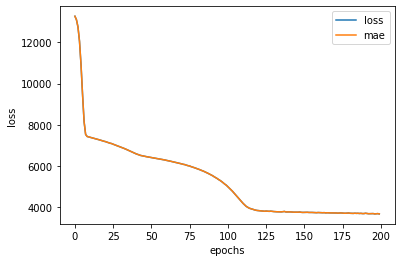

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")